In [1]:
import uproot as up
import matplotlib.pyplot as plot
import numpy as np

In [25]:
file_name_neutron = "/hpc/group/vossenlab/rck32/eic/work_eic/root_files/Clustering/December_30/n_1000events_3GeV_w_inner.edm4hep.root"
file_name_kaon = "/hpc/group/vossenlab/rck32/eic/work_eic/root_files/Clustering/December_30/K_L_1000events_3GeV_w_inner.edm4hep.root"

def get_rads(file_name,target_PDG):
    file = up.open(file_name)

    events = file["events"]

    MCParticles_endpoint_x = events["MCParticles/MCParticles.endpoint.x"].array(library = "numpy")
    MCParticles_endpoint_y = events["MCParticles/MCParticles.endpoint.y"].array(library = "numpy")
    PDG = events["MCParticles/MCParticles.PDG"].array(library = "numpy")
    status = events["MCParticles/MCParticles.generatorStatus"].array(library = "numpy")

    radial_distance = []
    for event_idx in range(len(PDG)):
        for particle_idx in range(len(PDG[event_idx])):
            if(status[event_idx][particle_idx] == 1):
                if(PDG[event_idx][particle_idx] == target_PDG):
                    radial_distance.append(pow(MCParticles_endpoint_x[event_idx][particle_idx].item() ** 2 + MCParticles_endpoint_y[event_idx][particle_idx].item() ** 2,0.5))
    radial_distance = np.array(radial_distance)
    return radial_distance[radial_distance < 5000]

In [30]:
n_rads = get_rads(file_name_neutron,target_PDG = 2112)
K_L_rads = get_rads(file_name_kaon,target_PDG = 130)

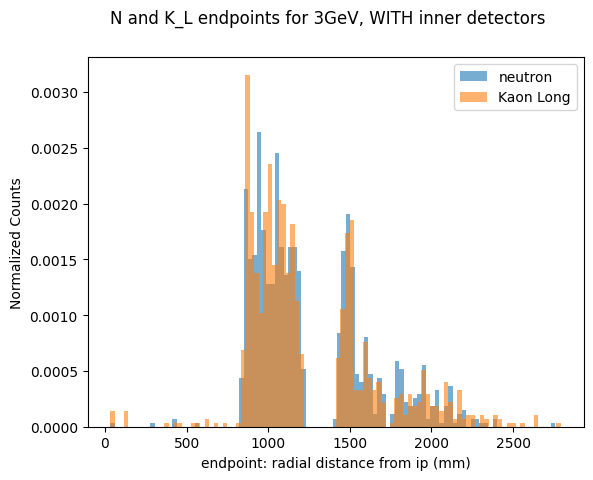

In [32]:
fig,axs = plot.subplots(1,1)
axs.hist(n_rads,bins = 100,density = True,alpha = 0.6,label = "neutron");
axs.hist(K_L_rads,bins = 100,density = True, alpha = 0.6,label = "Kaon Long");
axs.set_xlabel("endpoint: radial distance from ip (mm)")
axs.set_ylabel("Normalized Counts")
axs.legend()
fig.suptitle("N and K_L endpoints for 3GeV, WITH inner detectors")
fig.savefig("plots/Clustering/NvsK_L/doublehisto_w_inner.pdf")

In [4]:
up_file = up.open("/hpc/group/vossenlab/rck32/eic/EVGEN/pythia_ep_noradcor_10x100_q2_0.000000001_1.0_run9.ab.0756.eicrecon.tree.edm4eic.root")

In [ ]:
def check_virtuality(file_name):
    file = up.open(file_name)

    events = file["events"]

    MCParticles_momentum_x = events["MCParticles/MCParticles.momentum.x"].array(library = "numpy")
    MCParticles_momentum_y = events["MCParticles/MCParticles.momentum.y"].array(library = "numpy")
    MCParticles_momentum_z = events["MCParticles/MCParticles.momentum.y"].array(library = "numpy")
    MCParticles_momentum_E = events["MCParticles/MCParticles.energy"].array(library = "numpy")
    MCParticles_momentum_M = events["MCParticles/MCParticles.mass"].array(library = "numpy")
    PDG = events["MCParticles/MCParticles.PDG"].array(library = "numpy")
    status = events["MCParticles/MCParticles.generatorStatus"].array(library = "numpy")

    pT = []
    for event_idx in range(len(PDG)):
        for particle_idx in range(len(PDG[event_idx])):
            if(status[event_idx][particle_idx] i):
                if(PDG[event_idx][particle_idx] == target_PDG):
                    pT.append(pow(MCParticles_endpoint_x[event_idx][particle_idx].item() ** 2 + MCParticles_endpoint_y[event_idx][particle_idx].item() ** 2,0.5))
    radial_distance = np.array(radial_distance)
    return radial_distance[radial_distance < 5000]